In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# values with importance sampling
#reading in the data to compare the monte carlo error for different number of samples 


path = 'data1.1fPart1.txt'

data_error_compare = []

with open(path, 'r') as f:
    header = f.readline() 
    
    for line in f:
        
        columns = line.split()
        data_line = []
        for value in columns:
            data_line.append(float(value))
            
        data_error_compare.append(data_line)

In [3]:
#values without importance sampling
#reading in the data to compare the monte carlo error for different number of samples

path = 'data1.1dPart1.txt'

data_error_compare_no_sample = []

with open(path, 'r') as f:
    header = f.readline() 
    
    for line in f:
        
        columns = line.split()
        data_line = []
        for value in columns:
            data_line.append(float(value))
            
        data_error_compare_no_sample.append(data_line)

[-0.5043818   3.48116516]
[-0.46275316  3.94323685]


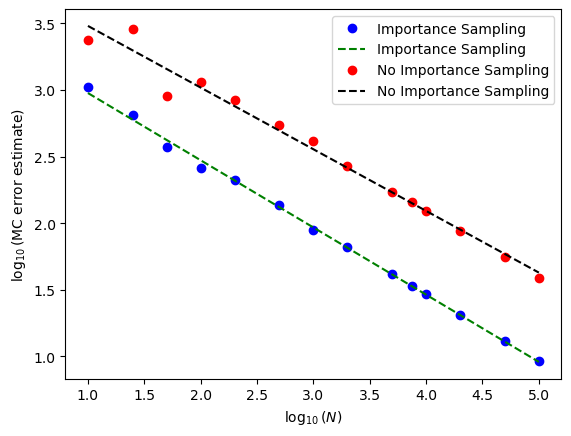

In [8]:
data_error_compare = np.array(data_error_compare)

x = np.log10(data_error_compare[:,0])
y = np.log10(data_error_compare[:,1])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)


data_error_compare_no_sample = np.array(data_error_compare_no_sample)

x_no_sample = np.log10(data_error_compare_no_sample[:,0])
y_no_sample = np.log10(data_error_compare_no_sample[:,1])

coef_no_sample = np.polyfit(x_no_sample,y_no_sample,1)
poly1d_fn_no_sample = np.poly1d(coef_no_sample)


plt.plot(x,y, 'bo', x, poly1d_fn(x), '--g',label='Importance Sampling')
plt.plot(x_no_sample,y_no_sample, 'ro', x_no_sample, poly1d_fn_no_sample(x), '--k',label='No Importance Sampling')

plt.ylabel(r'$\log_{10}$(MC error estimate)')
plt.xlabel(r'$\log_{10}(N)$')
plt.legend()
print(coef)
print(coef_no_sample)
plt.savefig('MCerror_N_loglog_importanceSamp.png',dpi=400)